In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.preprocessing import MinMaxScaler
import string
from nltk.corpus import stopwords
from tensorflow.keras.regularizers import l2

# Download necessary NLTK resources
# nltk.download('punkt')
# nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
# Define directories for each dataset


In [40]:
df_kaggle = pd.read_csv('kaggle_data_set/tripadvisor_hotel_reviews.csv')
df_scraped = pd.read_csv('normalized_scraped_reviews.csv')
scaler = MinMaxScaler(feature_range=(0, 1))
df_kaggle['normalized_score'] = scaler.fit_transform(df_kaggle[['Review Score']])
df = pd.concat([df_kaggle, df_scraped] , ignore_index=True)

In [41]:
# Function to lemmatize text
def preprocess_text(text):
    # Step 1: Convert text to lowercase
    text = text.lower()

    # Step 2: Remove punctuation
    # You can translate punctuation to None (removing it)
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Step 3: Tokenization
    tokens = nltk.word_tokenize(text)

    # Step 4: Remove stop words
    tokens = [word for word in tokens if word not in stop_words]

    # Step 5: Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Return the processed text as a single string
    return ' '.join(lemmatized_tokens)

# Lemmatize the review content
df['cleaned_content'] = df['Review Content'].apply(preprocess_text)

In [42]:
# Convert normalized scores to binary labels (1 for positive, 0 for negative)
df['label'] = df['normalized_score'].apply(lambda x: 0 if x <= 0.25 else (2 if x >= 0.75 else 1))
print(df['label'])
print(df.head())

print(df[['normalized_score', 'label']].describe())


0        2
1        0
2        1
3        2
4        2
        ..
30728    2
30729    2
30730    1
30731    2
30732    2
Name: label, Length: 30733, dtype: int64
                                      Review Content  Review Score  \
0  nice hotel expensive parking got good deal sta...           4.0   
1  ok nothing special charge diamond member hilto...           2.0   
2  nice rooms not 4* experience hotel monaco seat...           3.0   
3  unique, great stay, wonderful time hotel monac...           5.0   
4  great stay great stay, went seahawk game aweso...           5.0   

   normalized_score                                    cleaned_content  label  
0              0.75  nice hotel expensive parking got good deal sta...      2  
1              0.25  ok nothing special charge diamond member hilto...      0  
2              0.50  nice room 4 experience hotel monaco seattle go...      1  
3              1.00  unique great stay wonderful time hotel monaco ...      2  
4              1.

In [43]:
# Count the occurrences of each label
positive_count = (df['label'] == 2).sum()
negative_count = (df['label'] == 0).sum()
neutral_count = (df['label'] == 1).sum()

# Print the counts
print(f'Positive reviews: {positive_count}')
print(f'Negative reviews: {negative_count}')
print(f'Neutral reviews: {neutral_count}')
print(f"Total: {df['label'].count()}")

Positive reviews: 23496
Negative reviews: 3608
Neutral reviews: 3629
Total: 30733


In [44]:
# # Filter rows by label
# label_0 = df[df['label'] == 0]
# label_1 = df[df['label'] == 1]
# label_2 = df[df['label'] == 2]

# # Adjust rows with label 2 to have exactly 4000 rows
# current_count_label_2 = len(label_2)
# if current_count_label_2 > 6000:
#     label_2 = label_2.sample(n=6000, random_state=42)  # Randomly sample down to 4000
# # elif current_count_label_2 < 4000:
# #     additional_rows = label_2.sample(n=4000 - current_count_label_2, replace=True, random_state=42)  # Sample with replacement to increase to 4000
# #     label_2 = pd.concat([label_2, additional_rows])

# # Combine adjusted data
# df = pd.concat([label_0, label_1, label_2])

# # Optional: Shuffle the DataFrame if needed
# df= df.sample(frac=1, random_state=42).reset_index(drop=True)
# print(df.head())


In [45]:
# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['cleaned_content'])

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(df['cleaned_content'])
padded_sequences = pad_sequences(sequences, maxlen=100)

# Prepare labels
labels = df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.3, stratify=labels, random_state=42)




Epoch 1/10


c:\Users\Predator\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


538/538 ━━━━━━━━━━━━━━━━━━━━ 46s 67ms/step - accuracy: 0.7920 - loss: 0.6663 - val_accuracy: 0.8299 - val_loss: 0.4860
Epoch 2/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 33s 62ms/step - accuracy: 0.8549 - loss: 0.3986 - val_accuracy: 0.8278 - val_loss: 0.4587
Epoch 3/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 32s 60ms/step - accuracy: 0.8867 - loss: 0.3042 - val_accuracy: 0.8294 - val_loss: 0.4756
Epoch 4/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 33s 61ms/step - accuracy: 0.9175 - loss: 0.2362 - val_accuracy: 0.8287 - val_loss: 0.5769
Epoch 5/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 35s 65ms/step - accuracy: 0.9427 - loss: 0.1812 - val_accuracy: 0.8213 - val_loss: 0.6964
Epoch 6/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 33s 62ms/step - accuracy: 0.9562 - loss: 0.1479 - val_accuracy: 0.8257 - val_loss: 0.7386
Epoch 7/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 33s 62ms/step - accuracy: 0.9683 - loss: 0.1103 - val_accuracy: 0.8269 - val_loss: 0.7810
Epoch 8/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 35s 66ms/step - accuracy: 0.9749 - loss: 0.0902 - val_accurac

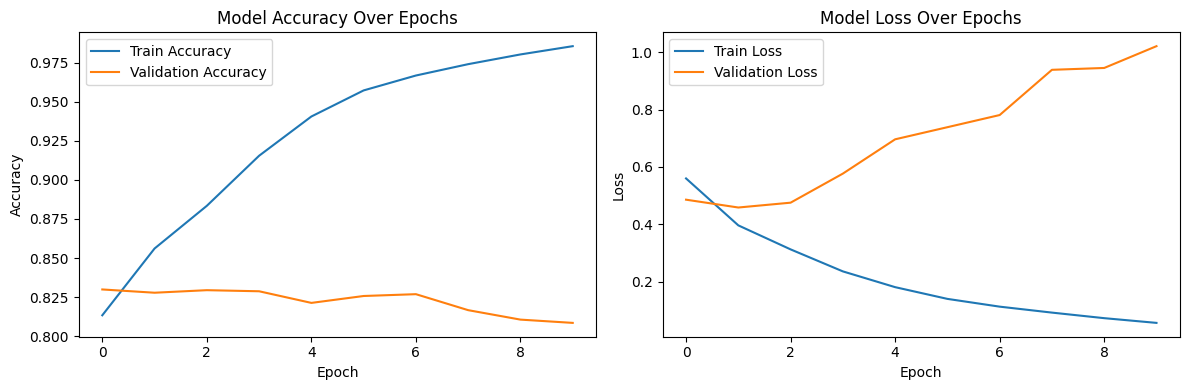

In [46]:
# Model creation
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),  # Corrected placement
    Dropout(0.5),
    Dense(3, activation='softmax')  # Assuming 3 classes for multi-class classification
])

# Model Compilation
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Model Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')  # Rounded to 4 decimal places for clarity

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [47]:
# Count the occurrences of each label
positive_count = (df['label'] == 2).sum()
negative_count = (df['label'] == 0).sum()
neutral_count = (df['label'] == 1).sum()

# Print the counts
print(f'Positive reviews: {positive_count}')
print(f'Negative reviews: {negative_count}')
print(f'Neutral reviews: {neutral_count}')
print(f"Total: {df['label'].count()}")

Positive reviews: 23496
Negative reviews: 3608
Neutral reviews: 3629
Total: 30733


In [10]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example input reviews
new_reviews = [
    {"review": "The hotel staff was incredibly helpful and the room was clean and spacious. Definitely a positive experience!", "score": 1.0},
    {"review": "The location was good, but the room had a strange smell and the service was just okay.", "score": 0.6},
    {"review": "I had a terrible stay. The room was dirty and the staff was rude. Not worth the price.", "score": 0.2},
    {"review": "Amazing experience! The view from the room was breathtaking and the food at the restaurant was top-notch.", "score": 1.0},
    {"review": "The room was decent, but the Wi-Fi was slow and unreliable. It was an average stay overall.", "score": 0.5},
    {"review": "Terrible service! We waited over an hour for our room to be ready and the staff was not apologetic.", "score": 0.3},
    {"review": "The hotel was in a perfect location, close to all the major attractions. The room was comfortable and well-maintained.", "score": 0.9},
    {"review": "The facilities were outdated, and the air conditioning barely worked. I was disappointed with my stay.", "score": 0.4},
    {"review": "Great value for money! The hotel offered a lot of amenities and the staff was very friendly.", "score": 0.8},
    {"review": "The breakfast was good, but the room was small and the bed was uncomfortable. It was an okay stay.", "score": 0.6}
]

# Define a function to preprocess new input data
def preprocess_new_data(new_data):
    # Apply the same preprocessing function
    cleaned_data = [preprocess_text(entry["review"]) for entry in new_data]
    
    # Convert to sequences using the trained tokenizer
    sequences = tokenizer.texts_to_sequences(cleaned_data)
    
    # Pad the sequences
    padded_sequences = pad_sequences(sequences, maxlen=100)  # Use the same maxlen as your training data

    return padded_sequences

# Prepare reviews for prediction
padded_sequences = preprocess_new_data(new_reviews)

# Make predictions
predictions = model.predict(padded_sequences)

# Interpreting the predictions
for i, prediction in enumerate(predictions):
    predicted_label = np.argmax(prediction)  # Get the index of the highest probability
    predicted_score = prediction[predicted_label]  # The probability of the predicted class
    actual_score = new_reviews[i]["score"]

    # Assign sentiment based on the predicted label
    sentiment_labels = ['Negative', 'Neutral', 'Positive']
    sentiment = sentiment_labels[predicted_label]

    # Print the results
    print(f"Review: {new_reviews[i]['review']}")
    print(f"Actual Score: {actual_score:.2f}")
    print(f"Predicted Label: {sentiment}")
    print(f"Negative Probability: {prediction[0]:.2f}")
    print(f"Neutral Probability: {prediction[1]:.2f}")
    print(f"Positive Probability: {prediction[2]:.2f}")
    print("-" * 50)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Review: The hotel staff was incredibly helpful and the room was clean and spacious. Definitely a positive experience!
Actual Score: 1.00
Predicted Label: Positive
Negative Probability: 0.00
Neutral Probability: 0.01
Positive Probability: 0.99
--------------------------------------------------
Review: The location was good, but the room had a strange smell and the service was just okay.
Actual Score: 0.60
Predicted Label: Neutral
Negative Probability: 0.05
Neutral Probability: 0.95
Positive Probability: 0.00
--------------------------------------------------
Review: I had a terrible stay. The room was dirty and the staff was rude. Not worth the price.
Actual Score: 0.20
Predicted Label: Neutral
Negative Probability: 0.42
Neutral Probability: 0.58
Positive Probability: 0.00
--------------------------------------------------
Review: Amazing experience! The view from the room was breathtaking and the food at the restaurant was top-notch.
Actual Score: 1.

In [11]:
from datetime import datetime
import os

# Assuming `model` is your Keras model
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
file_name = f'saved_models/general_sentiment_softmax_{timestamp}.keras'

# Make sure the directory exists
os.makedirs(os.path.dirname(file_name), exist_ok=True)

# Save the model with the unique file name
model.save(file_name)
print(f"Model saved as {file_name}")
model.summary()

Model saved as saved_models/general_sentiment_softmax_20240825_002342.keras


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 96, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 48, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 48, 128)        │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,563,019 (9.78 MB)

 Trainable params: 854,339 (3.26 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,708,680 (6.52 MB)